In [1]:
using Distributions
using StatsPlots
default(fmt=:png, legendfontsize=14, guidefontsize=14)

rd(x) = round(x; sigdigits=3)

function pvalue_wald(k, n, p)
    phat = k/n
    sehat = sqrt(phat*(1-phat)/n)
    z = (phat - p) / sehat
    2ccdf(Normal(), abs(z))
end

function ci_wald(k, n; alpha=0.05)
    phat = k/n
    sehat = sqrt(phat*(1-phat)/n)
    z = cquantile(Normal(), alpha/2)
    [phat-z*sehat, phat+z*sehat]
end

function pvalue_score(k, n, p)
    phat = k/n
    se = sqrt(p*(1-p)/n)
    z = (phat - p) / se
    2ccdf(Normal(), abs(z))
end

function ci_score(k, n; alpha=0.05)
    phat = k/n
    z = cquantile(Normal(), alpha/2)
    a, b, c = 1+z^2/n, phat+z^2/(2n), phat^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

function prob(f, n, p)
    bin = Binomial(n, p)
    xmin, xmax = extrema(bin)
    mu, sigma = mean(bin), std(bin)
    a, b = round(Int, max(xmin, mu-5sigma)), round(Int, min(xmax, mu+5sigma))
    sum(k -> f(k)*pdf(bin, k), a:b)
end

function coverage(pvaluefunc, n, p; alpha=0.05)
    prob(k -> pvaluefunc(k, n, p) ≥ alpha, n, p)
end

function plot_and_show_results(; n=100, k=10, alpha=0.05)
    Wald__CI = ci_wald(k, n; alpha)
    Score_CI = ci_score(k, n; alpha)
    
    @show 1 - alpha
    @show Wald__CI .|> rd
    @show Score_CI .|> rd
    
    P1 = plot()
    plot!(p -> pvalue_wald(k, n, p), 0, 0.24; label="Wald", c=1)
    plot!(p -> pvalue_score(k, n, p), 0, 0.24; ls=:dash, label="score", c=2)
    plot!(Wald__CI, fill(alpha+0.004, 2); label="", c=1, lw=2)
    plot!(Score_CI, fill(alpha-0.004, 2); label="", c=2, lw=2)
    plot!(xtick=0:0.02:1, ytick=0:0.05:1)
    plot!(xguide="p", yguide="P-value")
    title!("P-value functions for n=$n, k=$k")

    P2 = plot()
    ps = range(0, 0.24, 481)
    plot!(ps, p -> coverage(pvalue_wald, n, p; alpha); label="Wald")
    plot!(ps, p -> coverage(pvalue_score, n, p; alpha); ls=:dash, label="score")
    hline!([1-alpha]; label="", c=:gray, ls=:dot)
    plot!(ylim=(0.898, 1.002))
    plot!(xtick=0:0.02:1, ytick=0:0.01:1)
    plot!(xguide="p", yguide="coverage probability")
    title!("coverage probabilities for n=$n, α=$alpha")

    plot(P1, P2; size=(1200, 400))
    plot!(leftmargin=8Plots.mm, bottommargin=8Plots.mm)
end

plot_and_show_results (generic function with 1 method)

1 - alpha = 0.97
Wald__CI .|> rd = [0.0349, 0.165]
Score_CI .|> rd = [0.0519, 0.184]


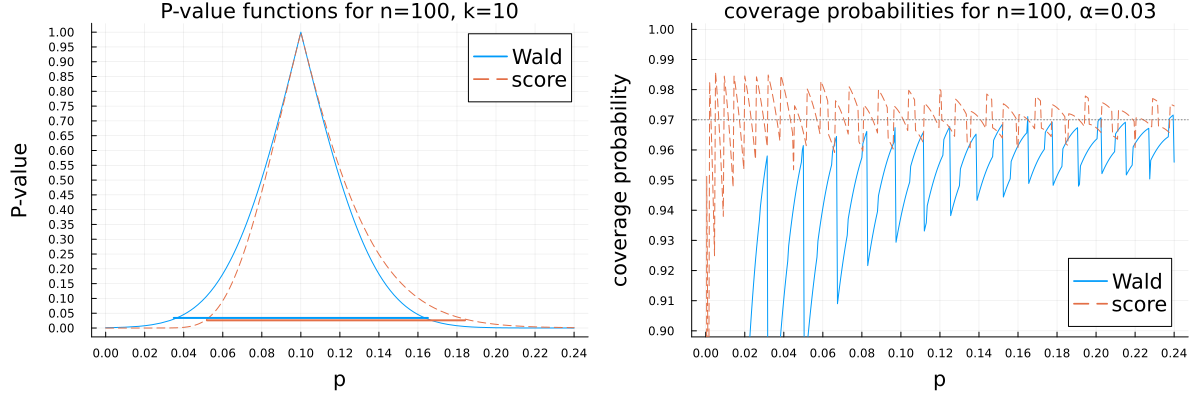

In [2]:
plot_and_show_results(; n=100, k=10, alpha=0.03)

1 - alpha = 0.97
Wald__CI .|> rd = [0.054, 0.146]
Score_CI .|> rd = [0.0628, 0.156]


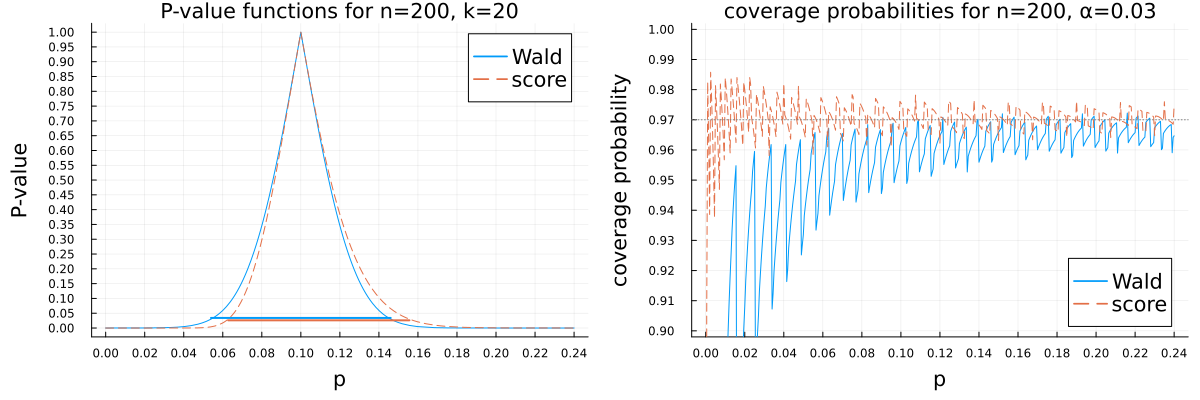

In [3]:
plot_and_show_results(; n=200, k=20, alpha=0.03)

1 - alpha = 0.97
Wald__CI .|> rd = [0.0674, 0.133]
Score_CI .|> rd = [0.072, 0.137]


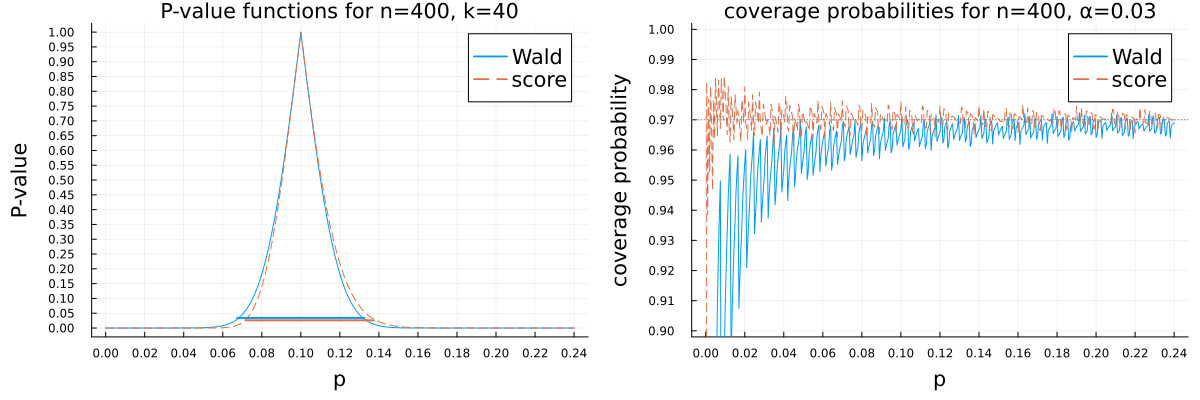

In [4]:
plot_and_show_results(; n=400, k=40, alpha=0.03)

1 - alpha = 0.97
Wald__CI .|> rd = [0.0794, 0.121]
Score_CI .|> rd = [0.0813, 0.122]


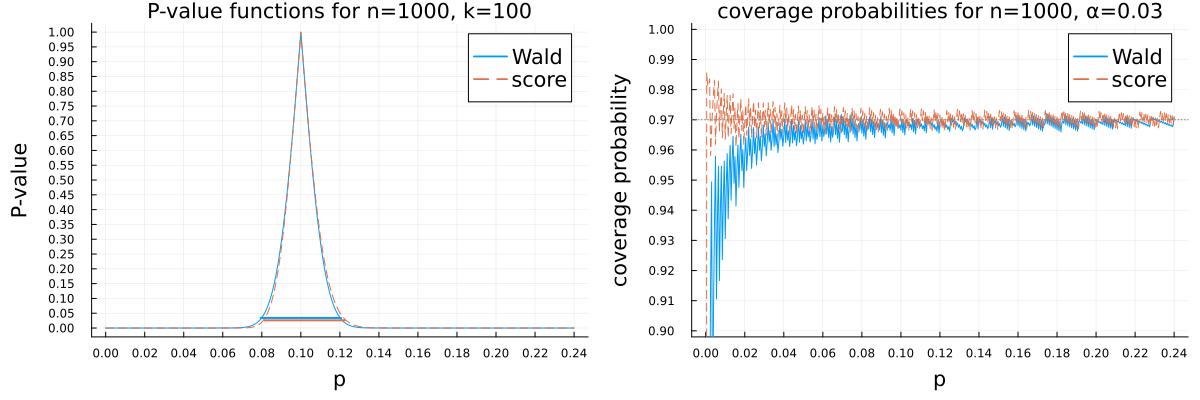

In [5]:
plot_and_show_results(; n=1000, k=100, alpha=0.03)